# Needed imports
Importing all the packages we need for the data we'll be using

In [1]:
# Data manipulation 
import pandas as pd

# Database I/O
import sqlite3

# for some data visualization
import seaborn as sns
import matplotlib.pyplot as plt

We're going to first simply see how many rides were taken each year

In [2]:
# Firstly see what tables we got in this database
with sqlite3.connect('data/database/citibike_data.db') as connection:
    all_tables_df = pd.read_sql_query(
        "SELECT name FROM sqlite_master WHERE type='table';",
        connection
    )
all_tables_df.head()

,name
0,citibike_rides_2013
1,citibike_rides_2014
2,citibike_rides_2015
3,citibike_rides_2016
4,citibike_rides_2017


In [7]:
rides_per_year = []
for each_table in all_tables_df['name'].tolist():
    with sqlite3.connect('data/database/citibike_data.db') as connection:
        print(f"Retrieving data for {each_table[-4:]}...")
        query = f"""
            Select 
                strftime('%Y-%m-%d %H:00:00', started_at) AS started_at
                , strftime('%Y-%m-%d %H:00:00', ended_at) AS ended_at
                , count(*) as ride_count 
            from {each_table} 
            group by 1,2
            """
        rides_per_year.append(
            pd.read_sql_query(
                query,
                connection,
                parse_dates=['started_at','ended_at']
            )
        )

rides_per_year_df = pd.concat(rides_per_year)

# Create a summary table
with sqlite3.connect('data/database/citibike_data.db') as connection:
    rides_per_year_df.to_sql(
        'ride_counts_by_hour'
        , connection
        , index=False
        , if_exists='replace'
    )

rides_per_year_df.info()


Retrieving data for 2013...
Retrieving data for 2014...
Retrieving data for 2015...
Retrieving data for 2016...
Retrieving data for 2017...
Retrieving data for 2018...
Retrieving data for 2019...
Retrieving data for 2020...
Retrieving data for 2021...
Retrieving data for 2022...
Retrieving data for 2023...
<class 'pandas.core.frame.DataFrame'>
Index: 554725 entries, 0 to 64925
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   started_at  554725 non-null  datetime64[ns]
 1   ended_at    554725 non-null  datetime64[ns]
 2   ride_count  554725 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 16.9 MB


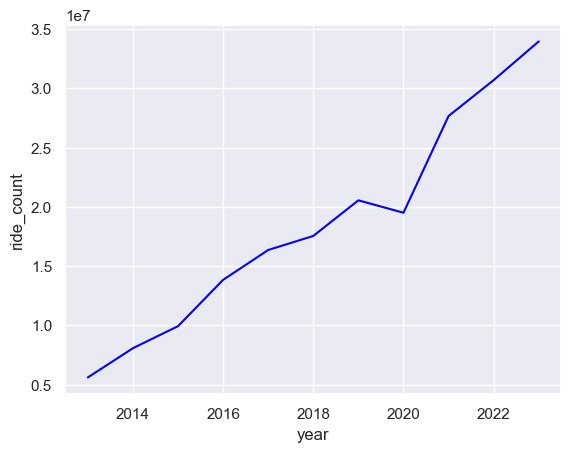

In [12]:
# we'll create a year column and use that to show growth
rides_per_year_df['year'] = rides_per_year_df['started_at'].dt.year

sns.set(style='darkgrid')

yearly_rides_df = rides_per_year_df[['year','ride_count']].groupby('year').sum().reset_index()

sns.lineplot(
    x       = 'year'
    , y     = 'ride_count'
    , data  = yearly_rides_df
    , color = 'blue'
)

plt.show()

<Axes: xlabel='month', ylabel='ride_count'>

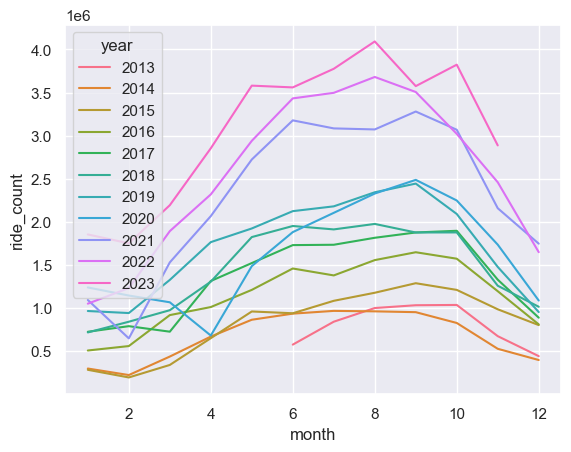

In [15]:
# we'll create a month column now
rides_per_year_df['month'] = rides_per_year_df['started_at'].dt.month

color_palette = sns.color_palette(
    "husl"
    , n_colors = len(rides_per_year_df['month'].unique())-1
)

monthly_rides_df = rides_per_year_df[['ride_count','month','year']].groupby(['month','year']).sum().reset_index()

sns.lineplot(
    x='month'
    , y='ride_count'
    , hue='year'
    , data= monthly_rides_df
    , palette= color_palette
)

<Axes: xlabel='hour', ylabel='ride_count'>

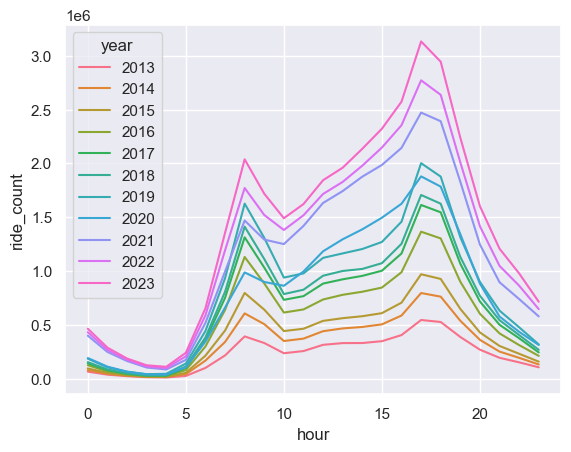

In [19]:
# Let's see what the most popular hour is
# we'll create a month column now
rides_per_year_df['hour'] = rides_per_year_df['started_at'].dt.hour

color_palette = sns.color_palette(
    "husl"
    , n_colors = len(rides_per_year_df['month'].unique())-1
)

hourly_rides_df = rides_per_year_df[['ride_count','hour','year']].groupby(['hour','year']).sum().reset_index()

sns.lineplot(
    x='hour'
    , y='ride_count'
    , hue='year'
    , data= hourly_rides_df
    , palette= color_palette
)